In [9]:
import pandas as pd
import os
from haversine import haversine

In [91]:
directory = '../data/weather_data/weather/excel'

wind_farm_data = {}

for file in os.listdir(directory):
    if file.endswith('.xlsx'):
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path, sheet_name=1)
        wind_farm_data[file] = df[['Original Latitude', 'Original Longitude', 'Response Latitude', 'Response Longitude']]

In [13]:
wind_farm_data = {}
all_distances = []  # List to store all distances for the overall average calculation

def calculate_distance(row):
    orig_coords = (row['Original Latitude'], row['Original Longitude'])
    resp_coords = (row['Response Latitude'], row['Response Longitude'])
    return haversine(orig_coords, resp_coords, unit='km')

for file in os.listdir(directory):
    # Check if the file is an Excel file
    if file.endswith('.xlsx'):
        # Construct the full path to the file
        file_path = os.path.join(directory, file)
        # Read the data from the second sheet (assuming sheets are 0-indexed and the second sheet is index 1)
        df = pd.read_excel(file_path, sheet_name=1)
        # Calculate the Haversine distance and add it as a new column
        df['Distance (km)'] = df.apply(calculate_distance, axis=1)
        # Append distances to the all_distances list
        all_distances.extend(df['Distance (km)'].tolist())
        # Store the data in the dictionary with the file name as the key
        wind_farm_data[file] = df

# Calculate the overall average distance across all wind farms
overall_average_distance = sum(all_distances) / len(all_distances)
overall_average_distance

4.456878063967375

In [26]:
len(all_distances)

79

In [80]:
min(all_distances)

0.9084079803390855

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [70]:
from PIL import Image, ImageDraw

def interpolate_color(color1, color2, factor: float):
    """Interpolate between two hex colors."""
    r1, g1, b1 = int(color1[1:3], 16), int(color1[3:5], 16), int(color1[5:7], 16)
    r2, g2, b2 = int(color2[1:3], 16), int(color2[3:5], 16), int(color2[5:7], 16)
    r = int(r1 + (r2 - r1) * factor)
    g = int(g1 + (g2 - g1) * factor)
    b = int(b1 + (b2 - b1) * factor)
    return f'#{r:02x}{g:02x}{b:02x}'

def generate_gradient_colors(start_color, end_color, steps):
    """Generate a list of colors forming a gradient between two hex colors."""
    return [interpolate_color(start_color, end_color, i / (steps - 1)) for i in range(steps)]


In [77]:
start_color = "#072140"
end_color = "#9ABCE4"

num_colors = 79

colors = generate_gradient_colors(start_color, end_color, num_colors)

C:\Users\SimBim\AppData\Local\Temp\ipykernel_27856\2128632367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(len(distances_df))), y=distances_df, palette=palette)


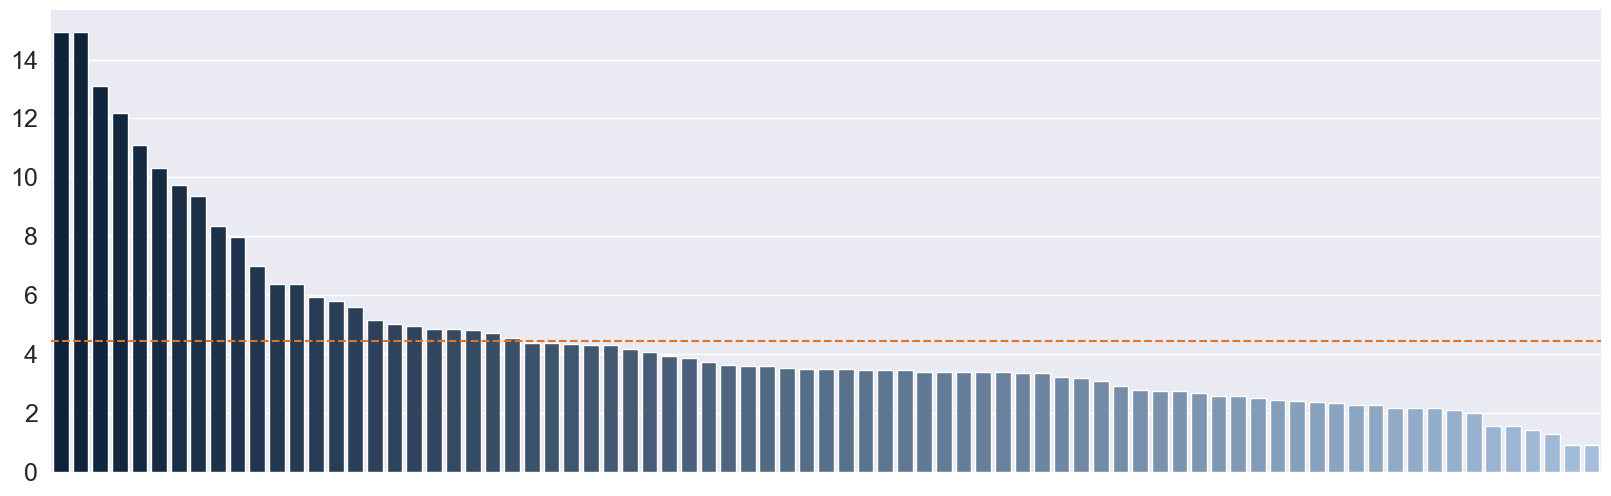

In [110]:
distances_df = pd.DataFrame(all_distances, columns=['Distance (km)'])
distances_df = sorted(all_distances, reverse=True)

sns.set_theme(style="darkgrid")

palette = sns.color_palette(colors, 79)


plt.figure(figsize=(20, 6))  
sns.barplot(x=list(range(len(distances_df))), y=distances_df, palette=palette)

average_distance = sum(all_distances) / len(all_distances)
plt.axhline(average_distance, color='#e37222', linestyle='--', label='Average Distance')

plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Remove x-axis labels
plt.yticks(fontsize=18)
    
plt.show()


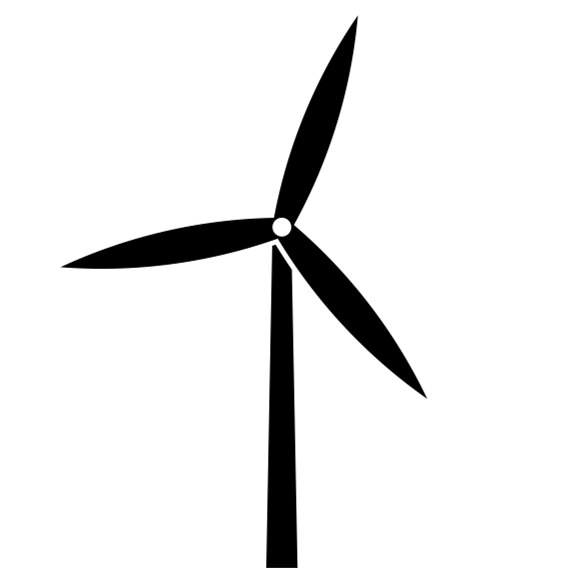
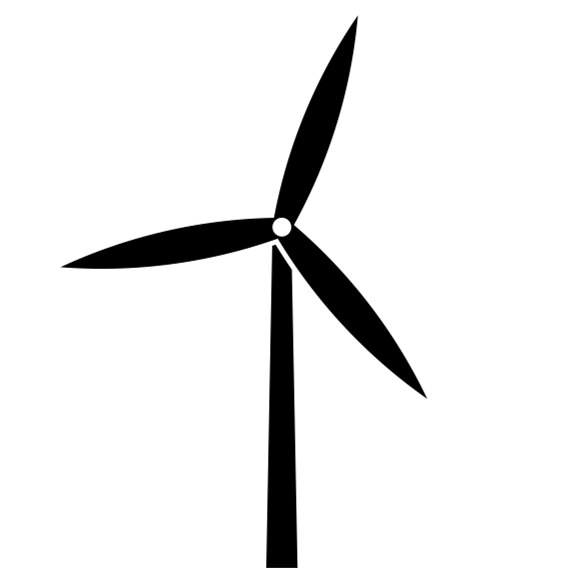
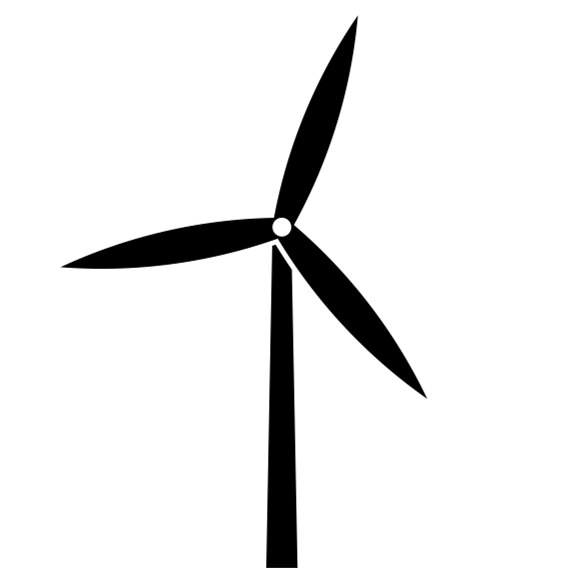
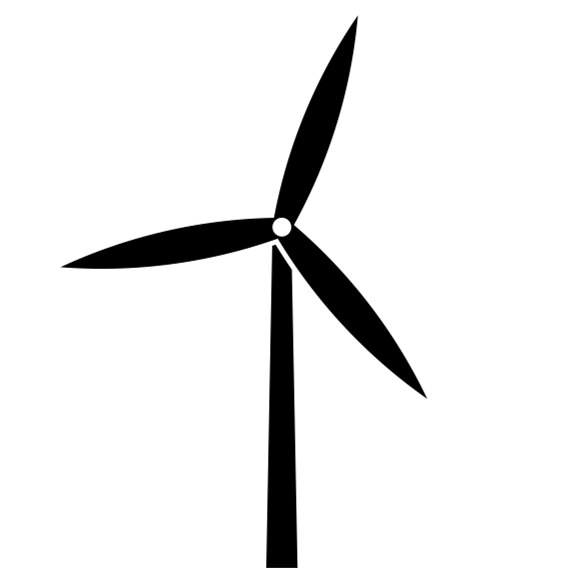
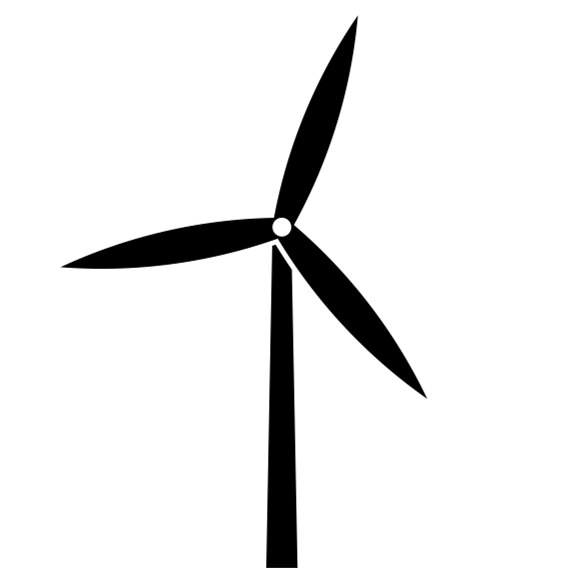
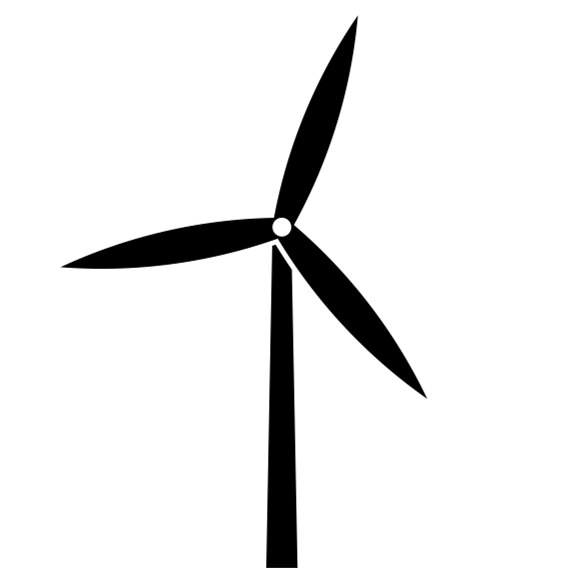
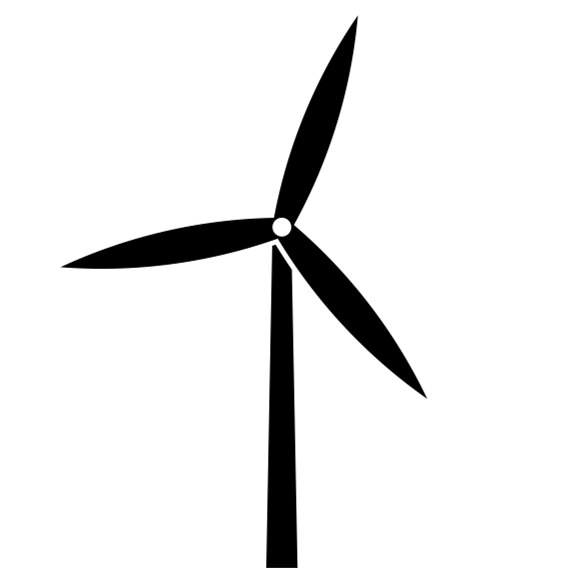
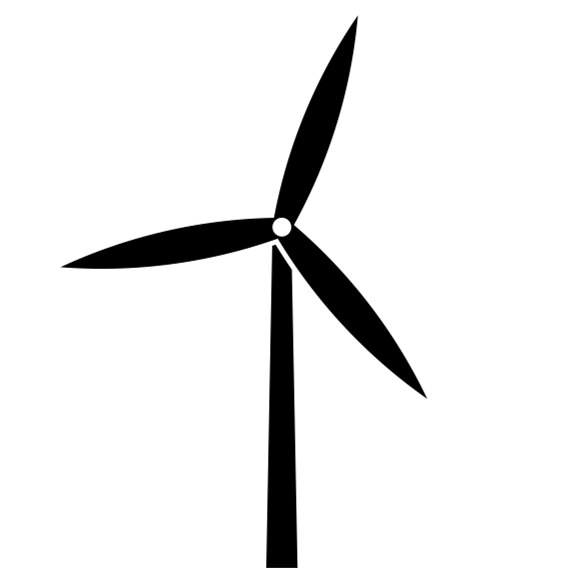
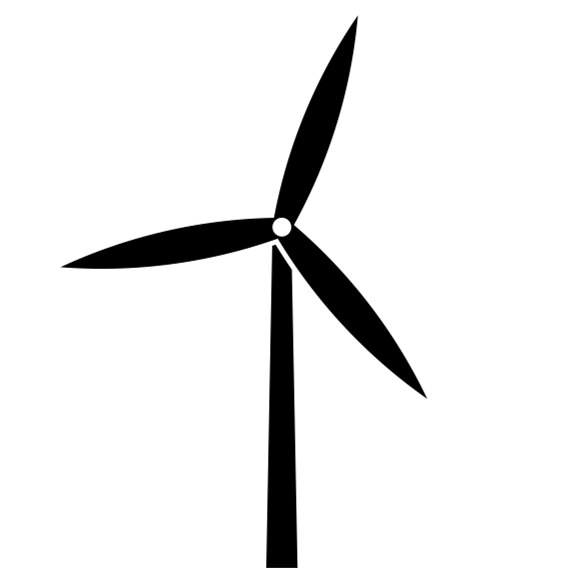
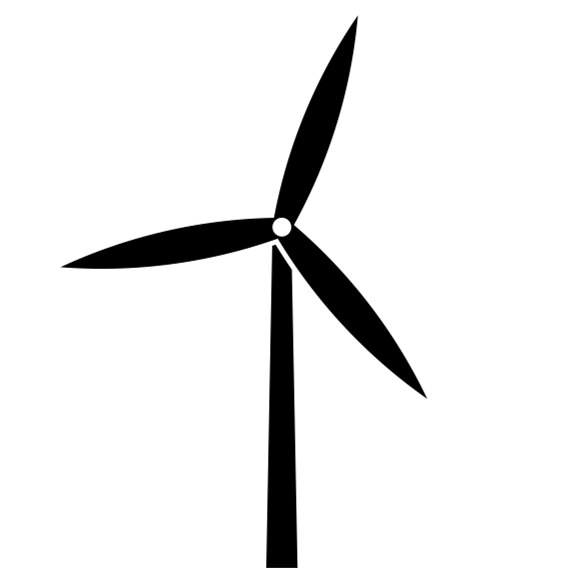
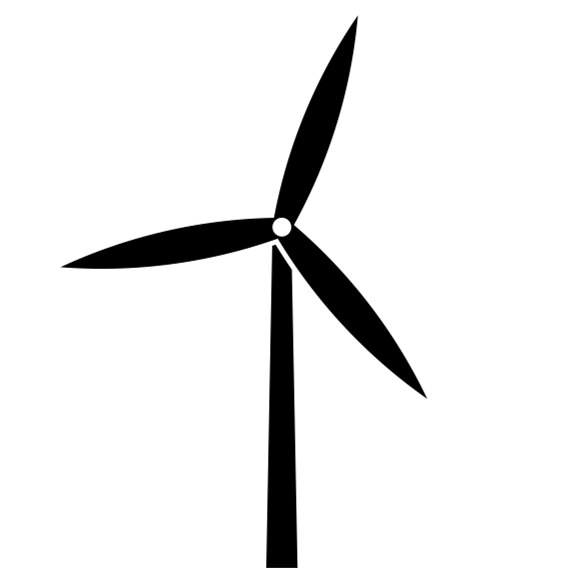
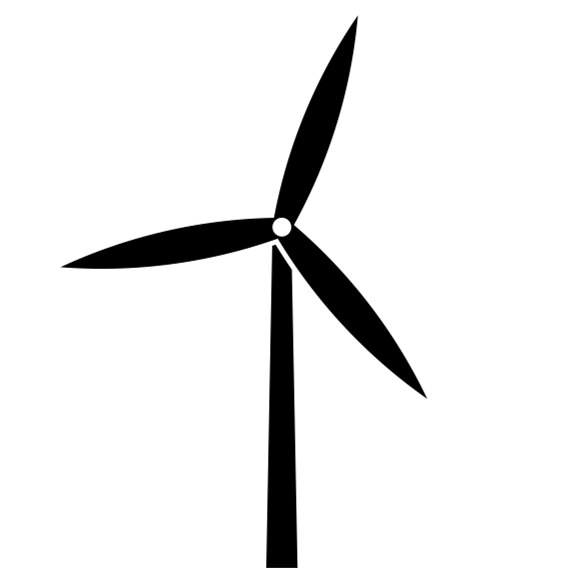
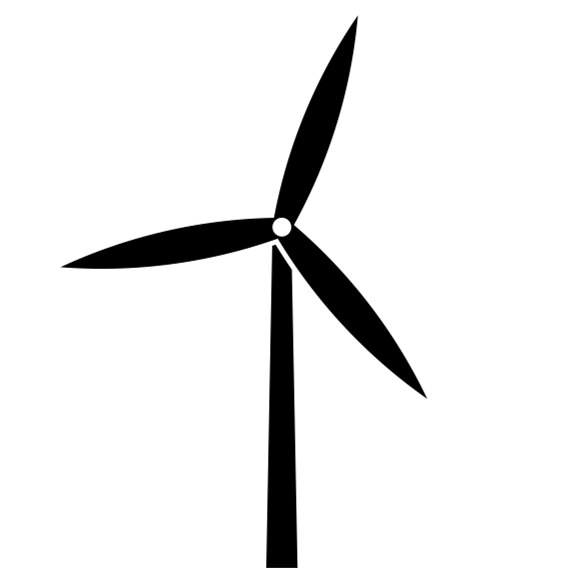
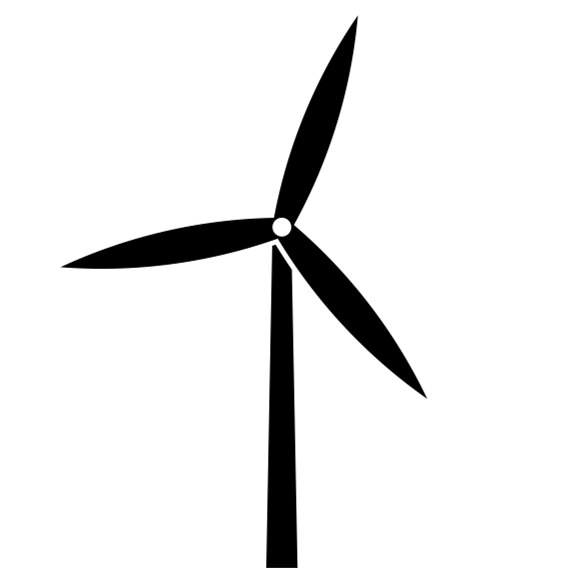
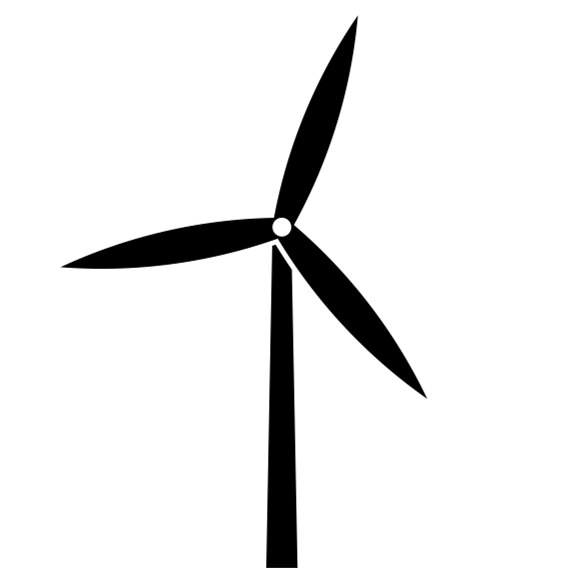
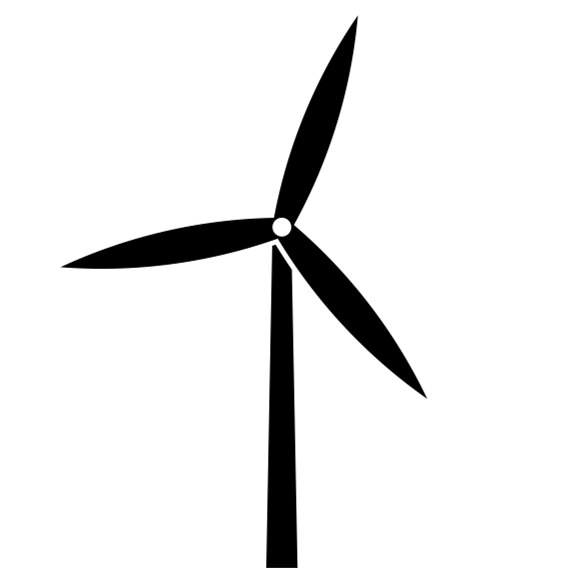
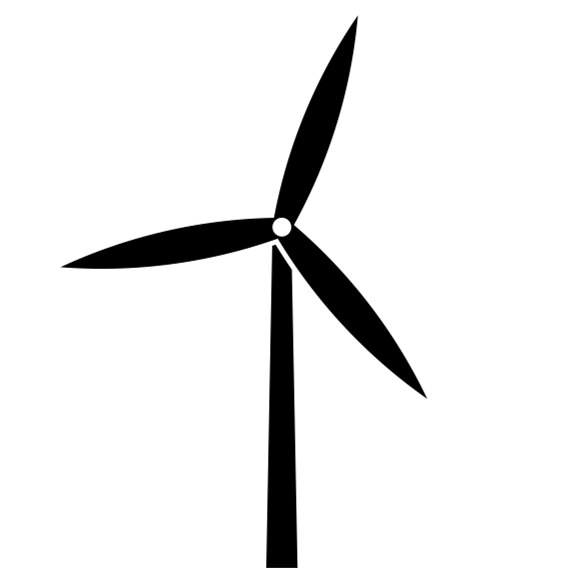
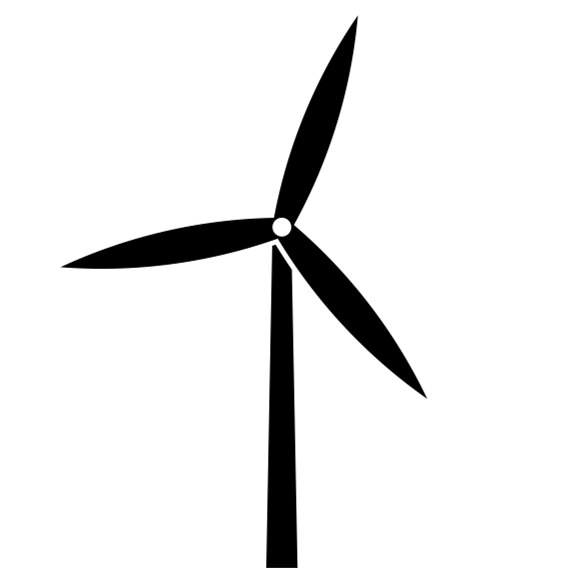
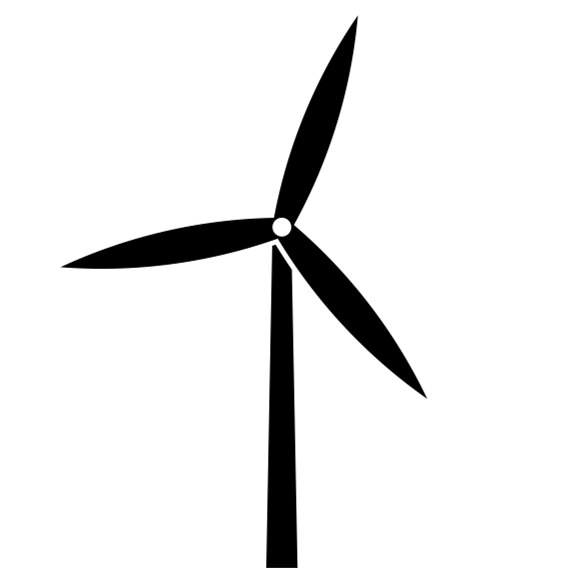
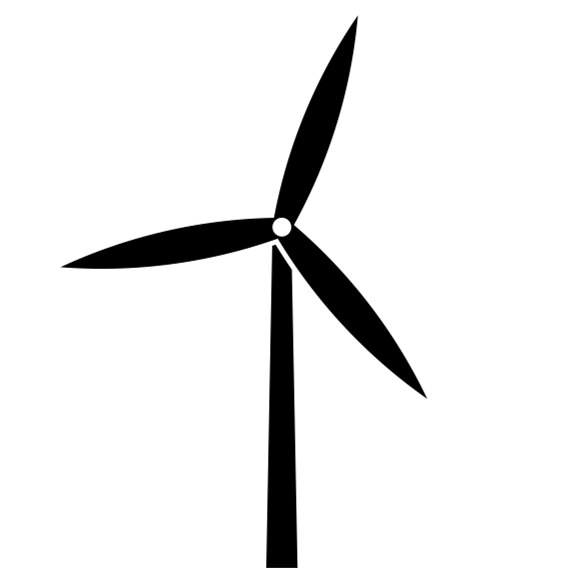
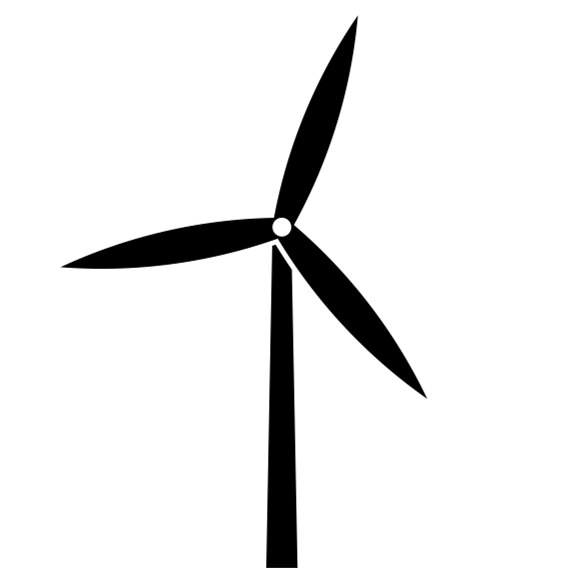
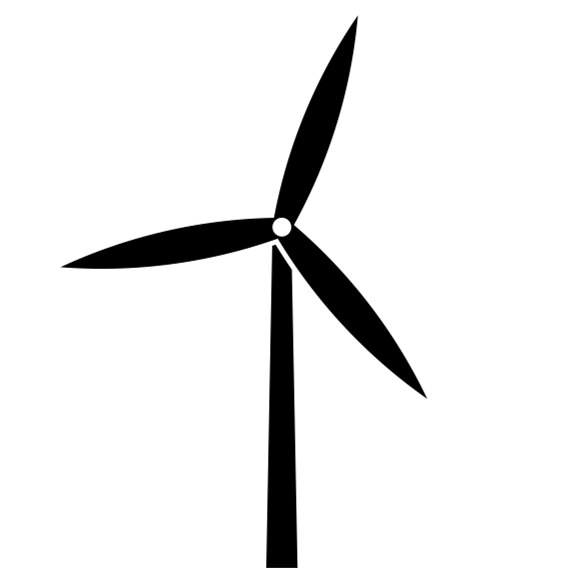
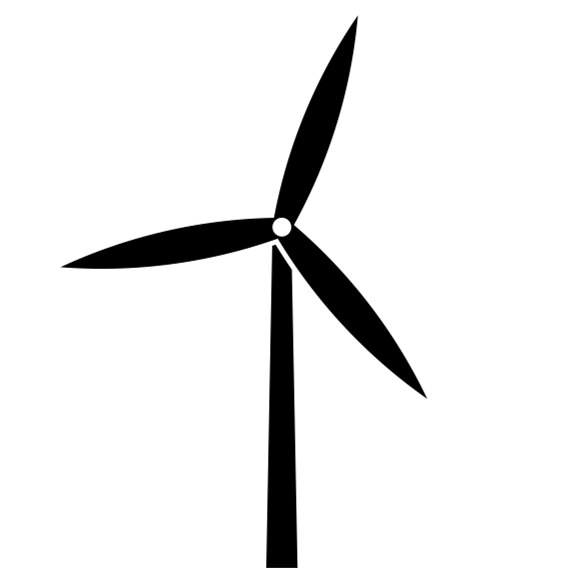
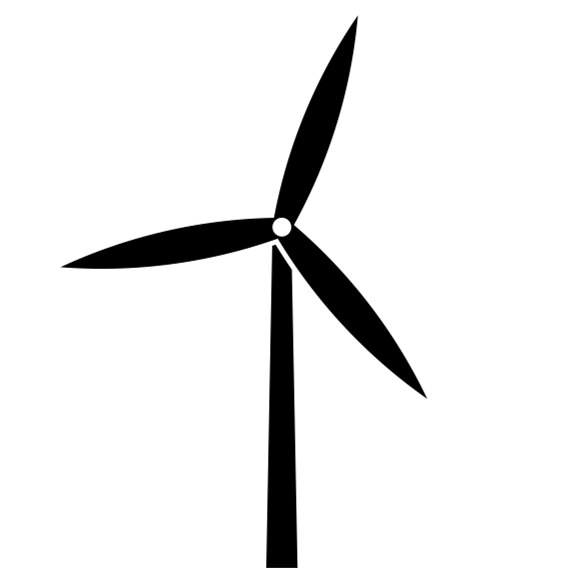
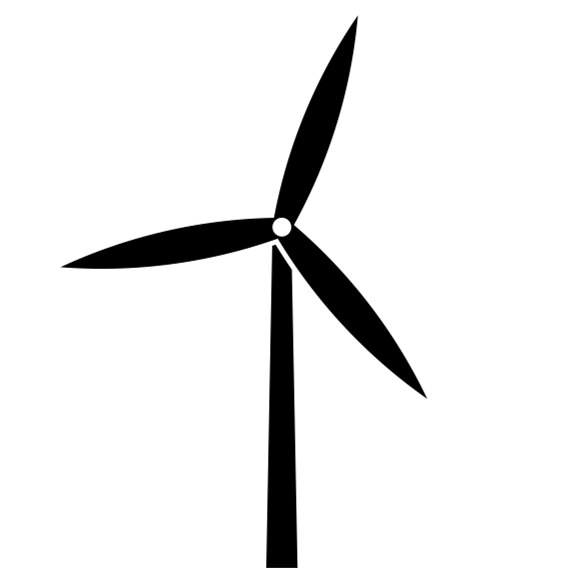
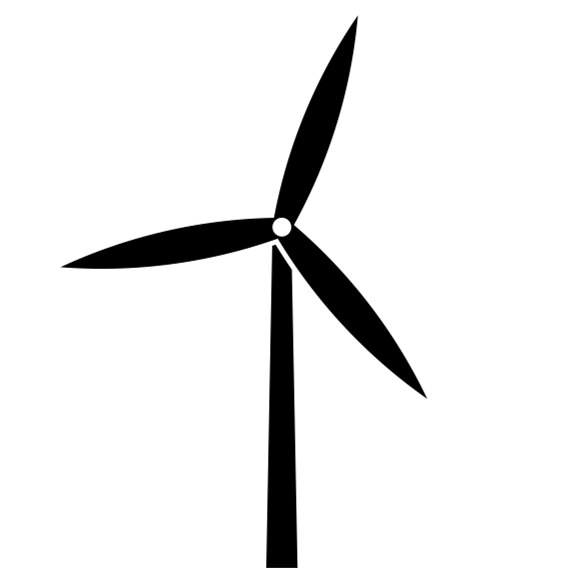
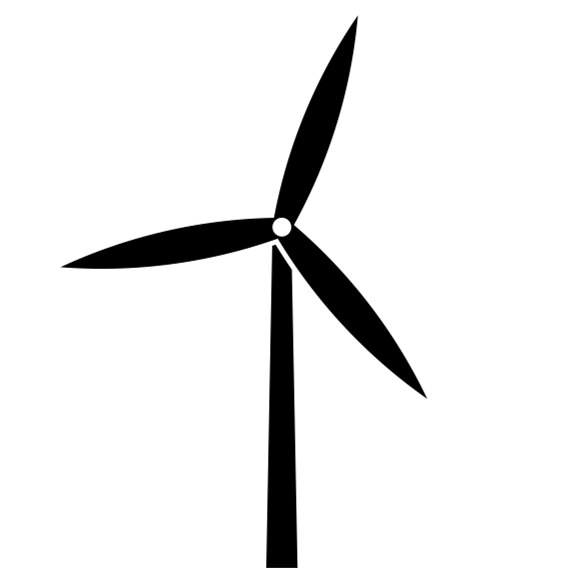
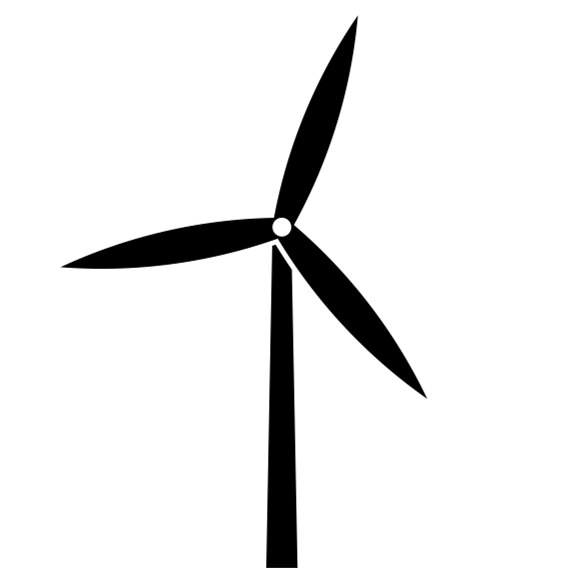
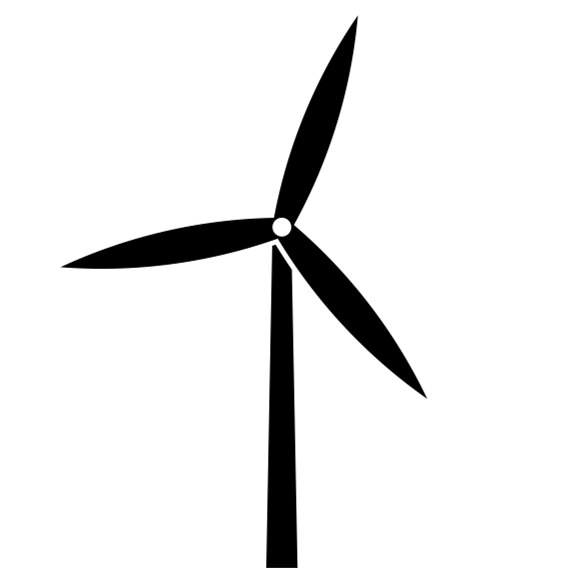
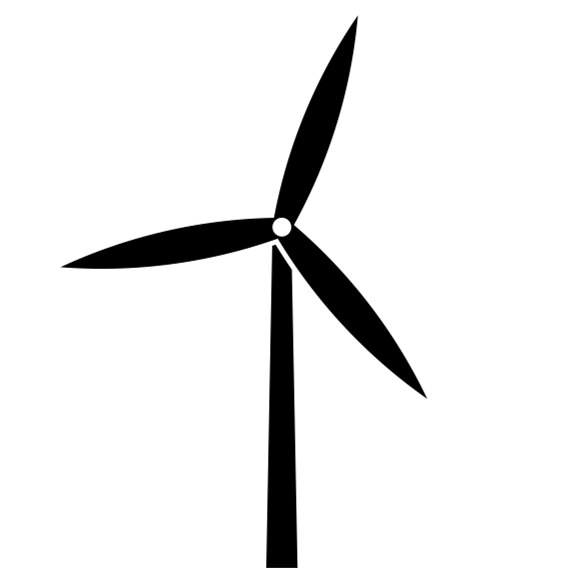
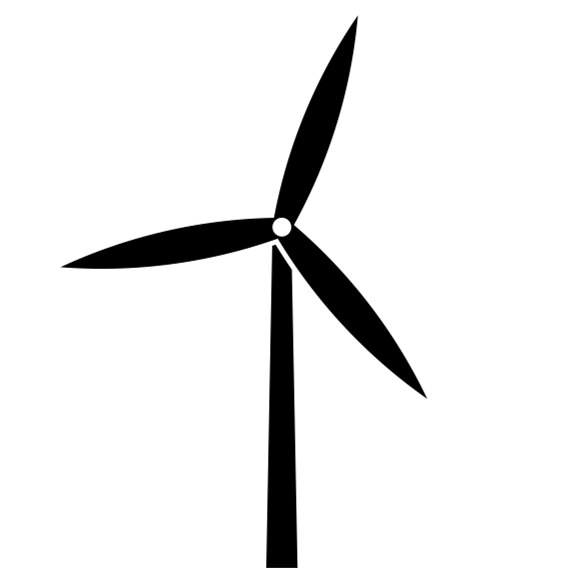
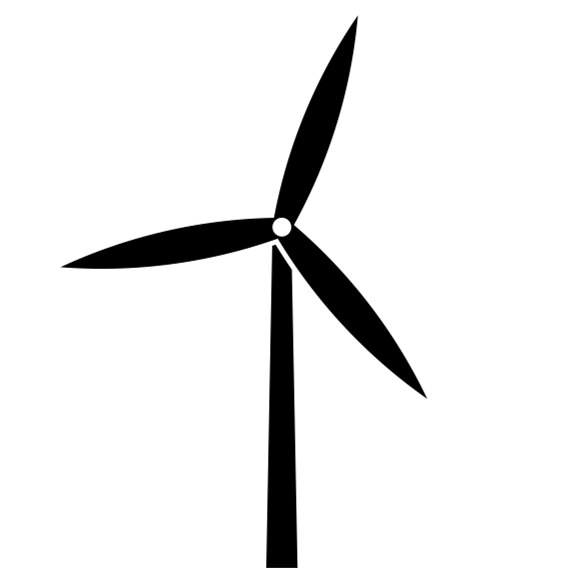
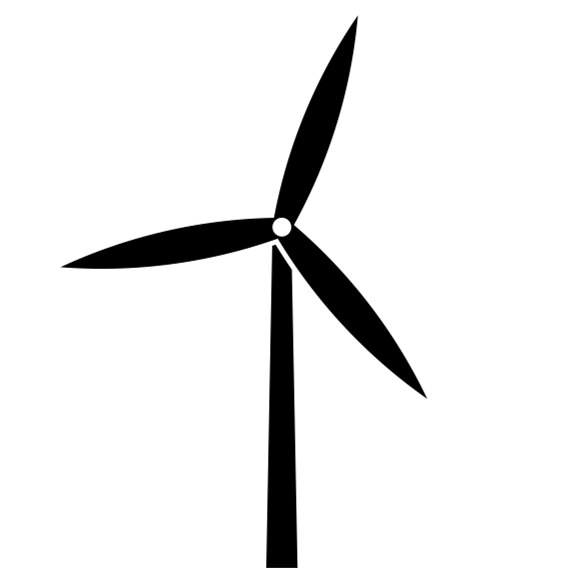
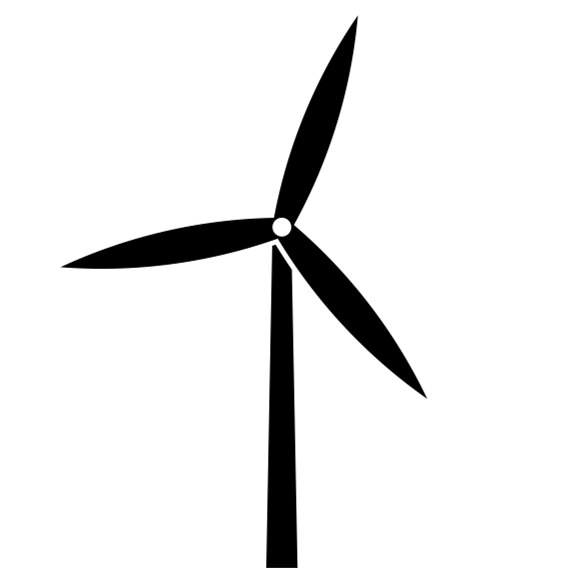
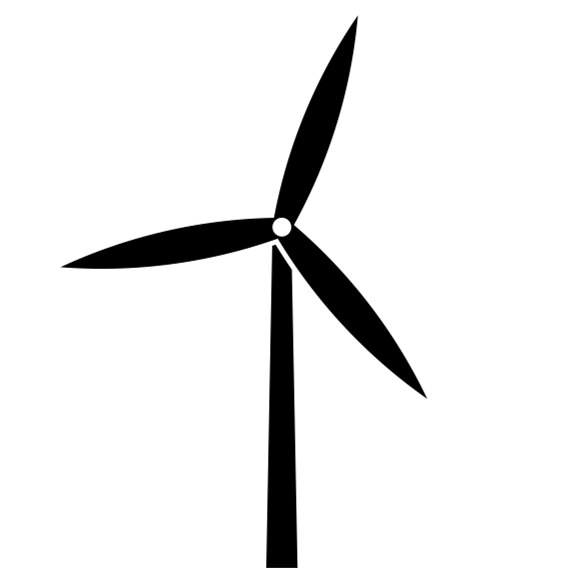
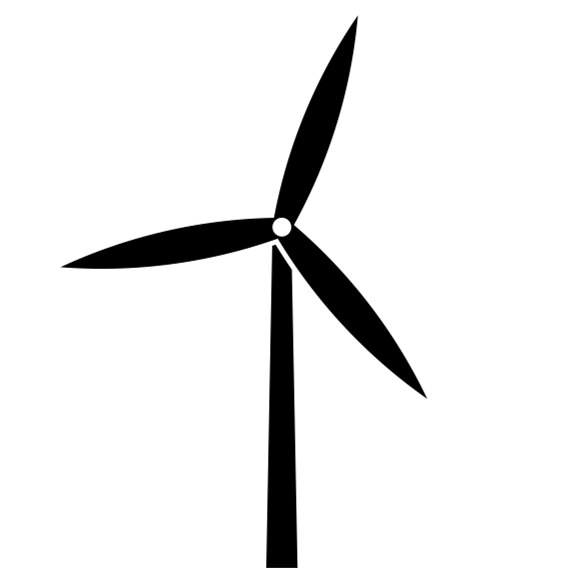
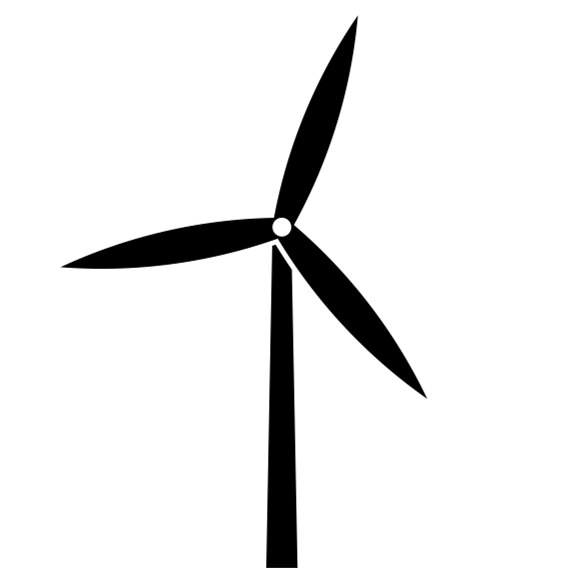
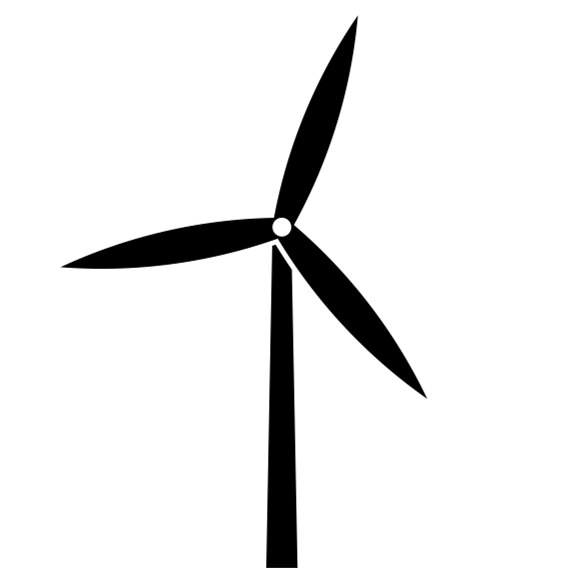
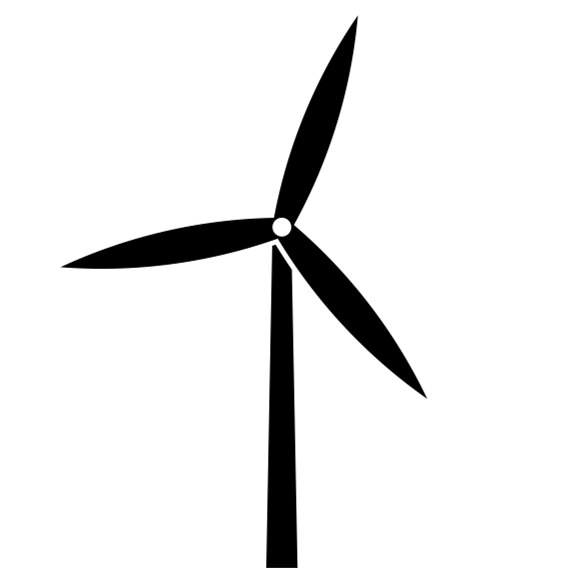
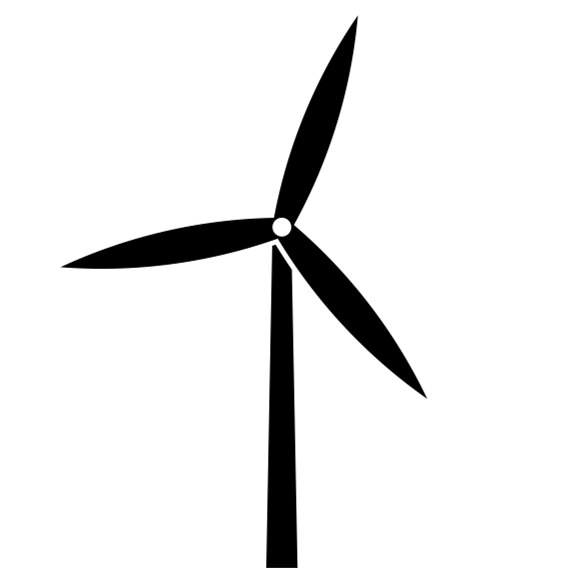
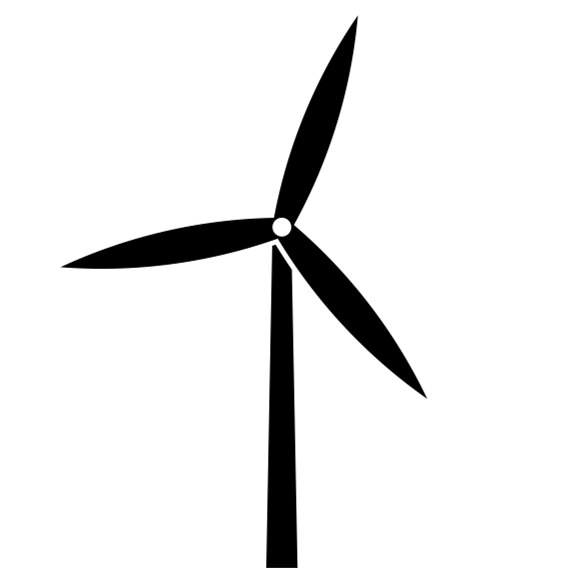
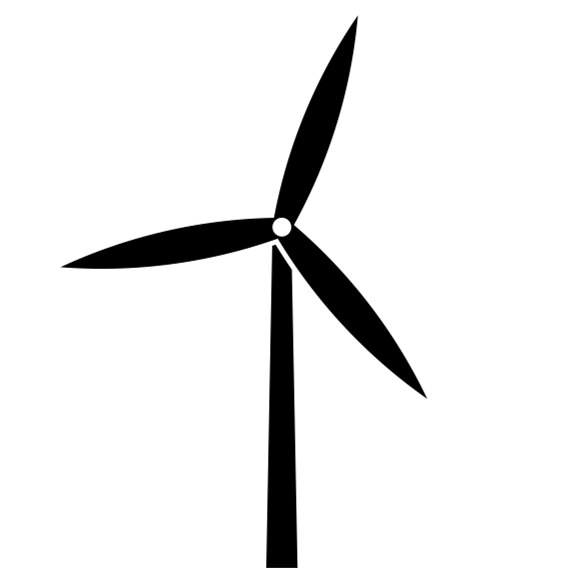
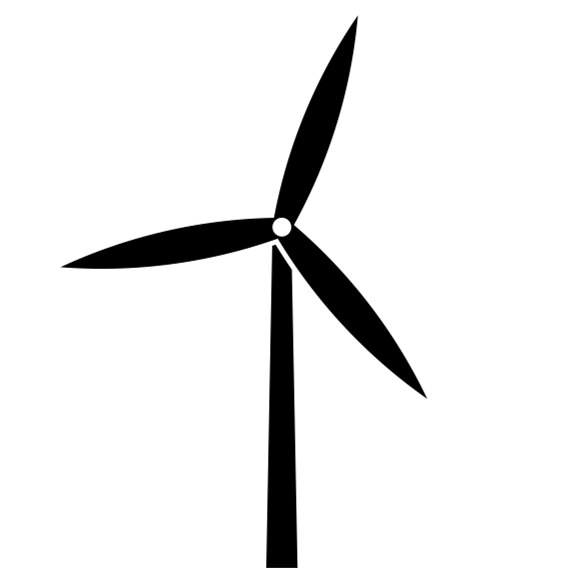
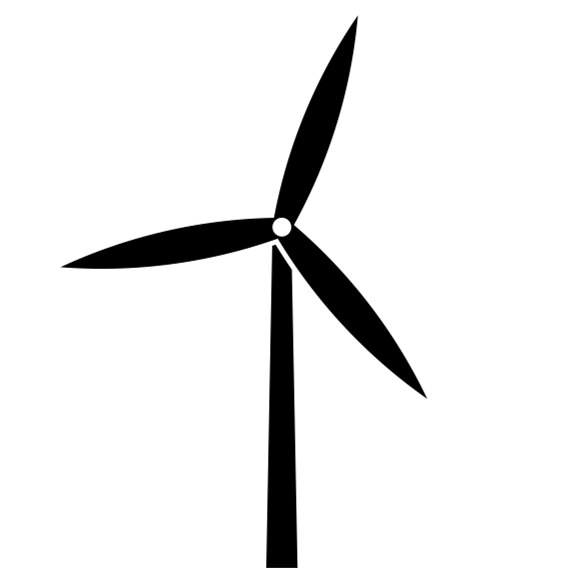
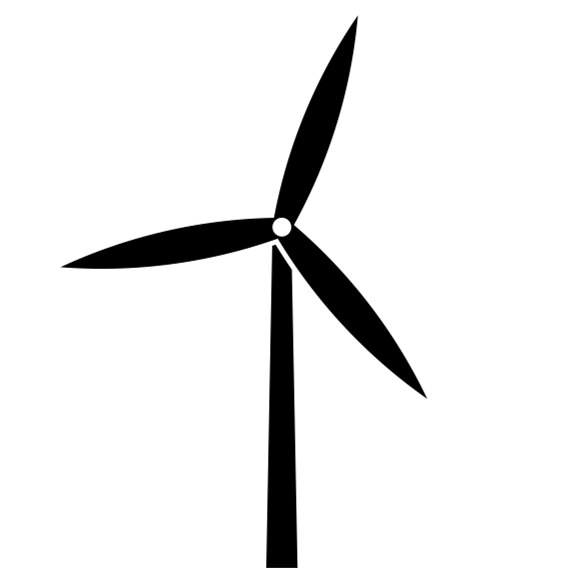
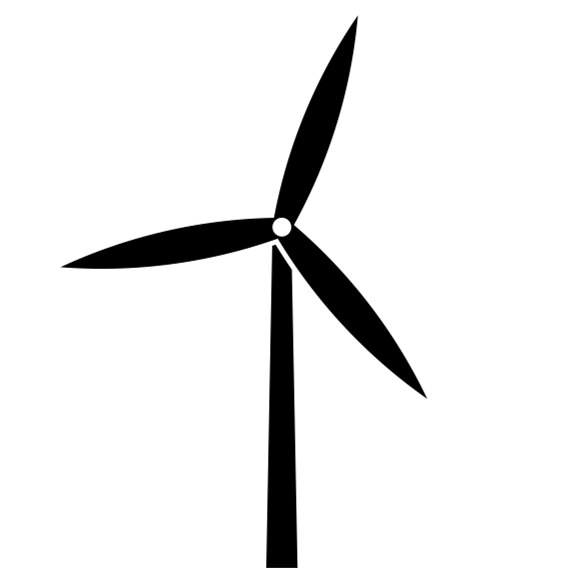
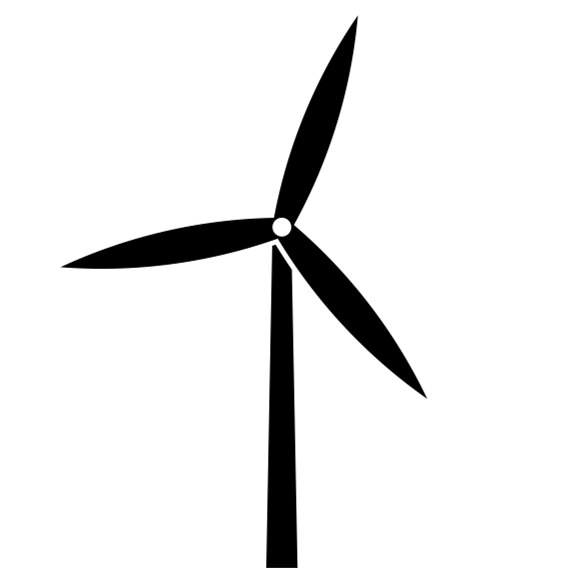
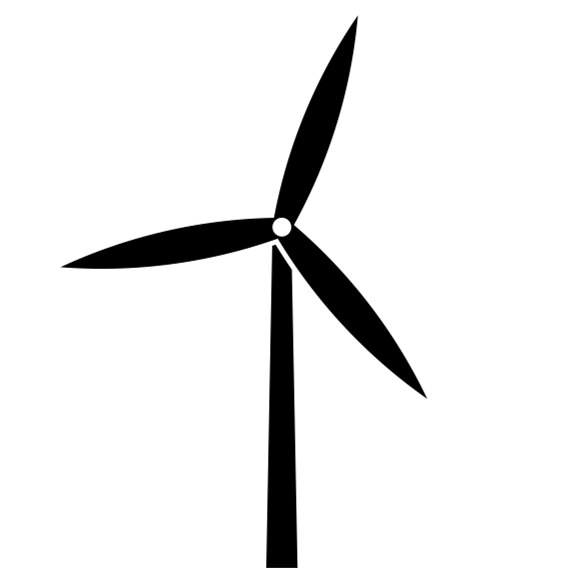
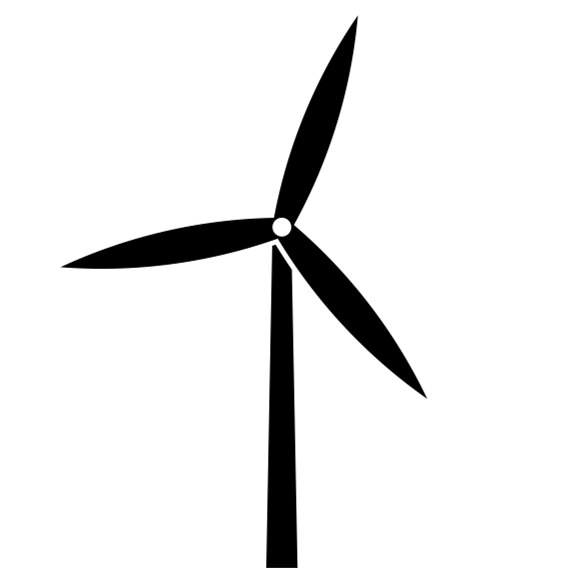
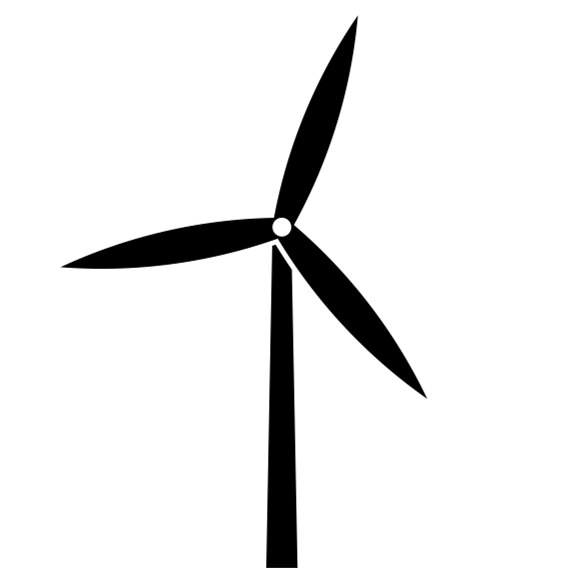
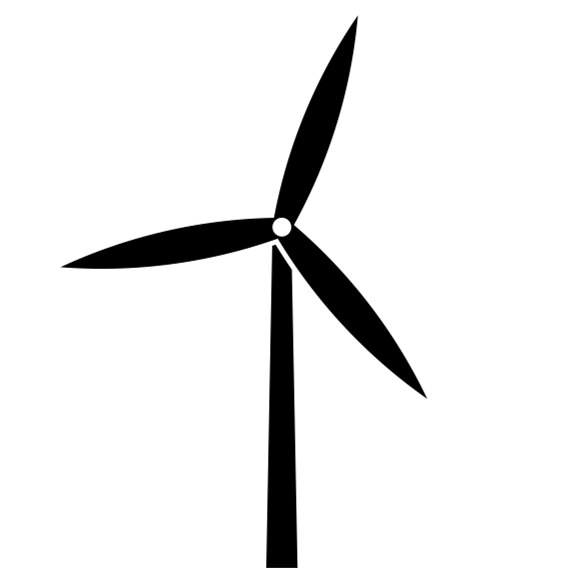
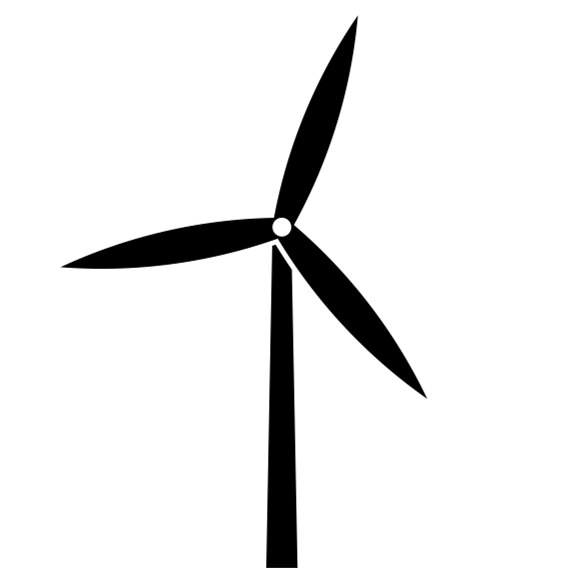
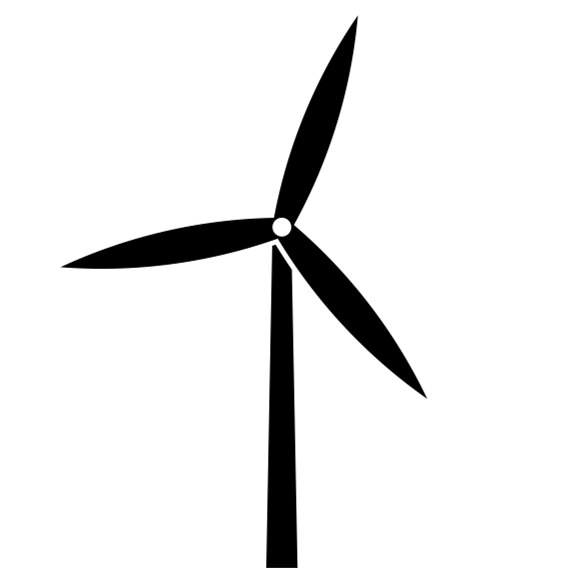
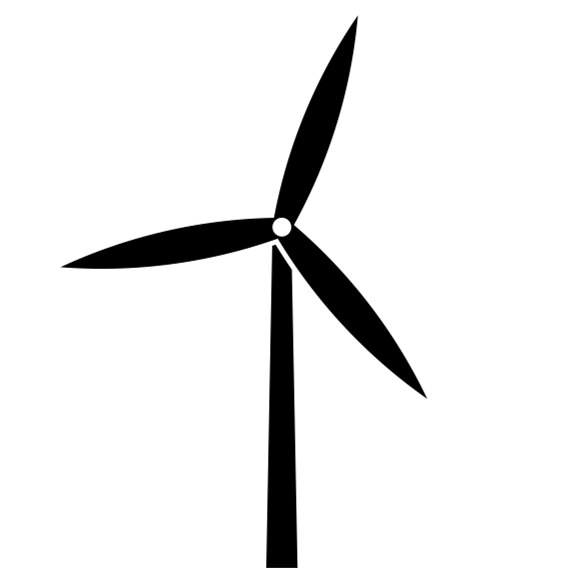
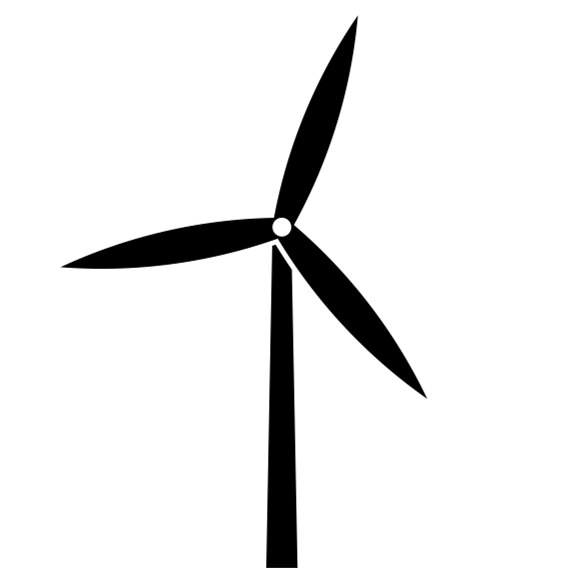
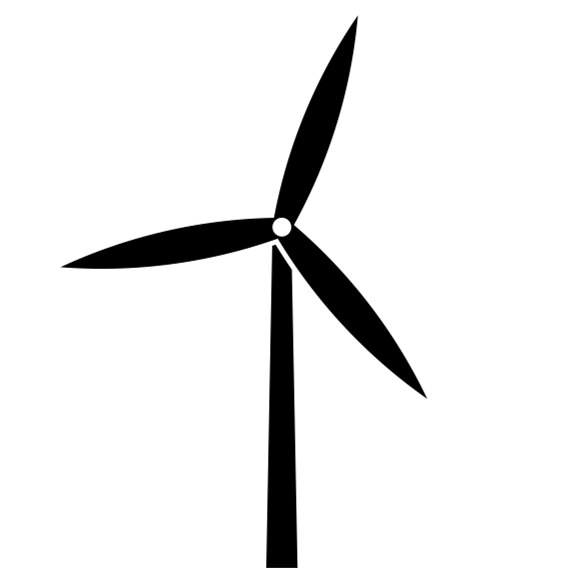
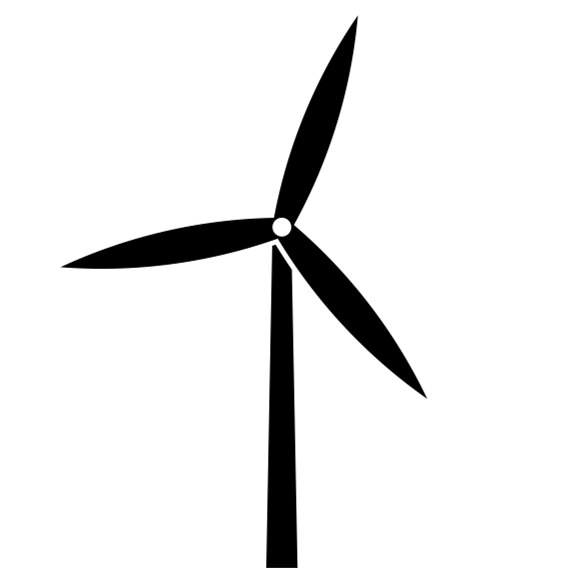
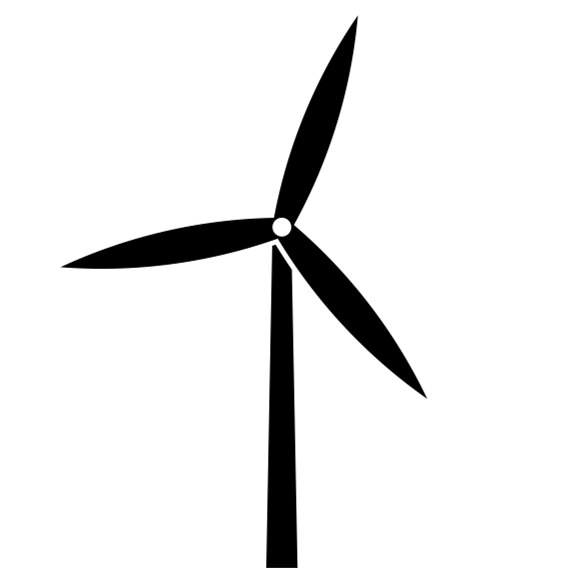
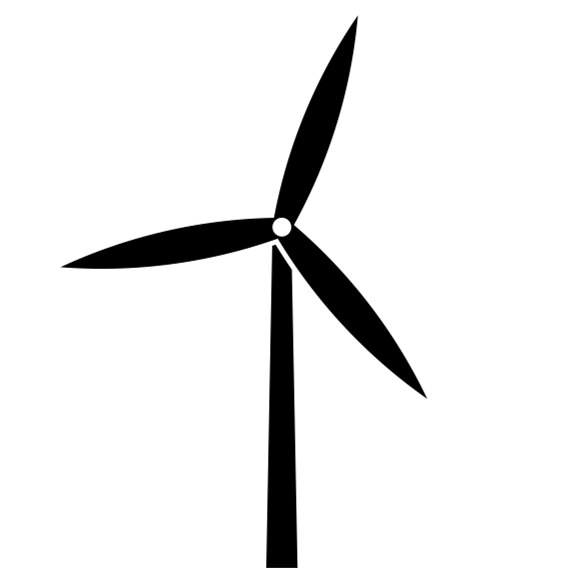
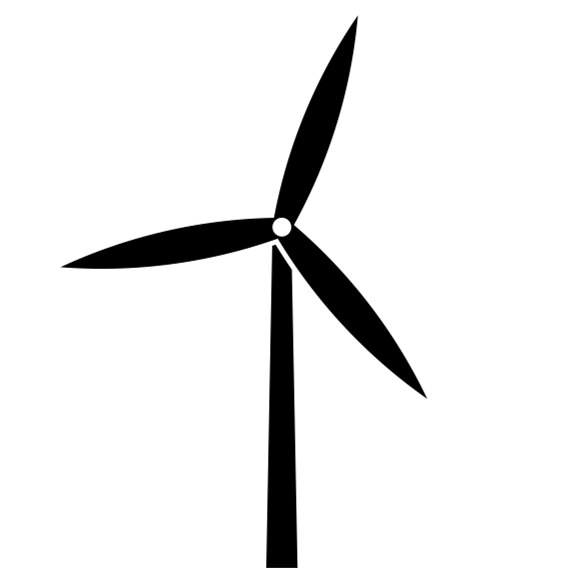
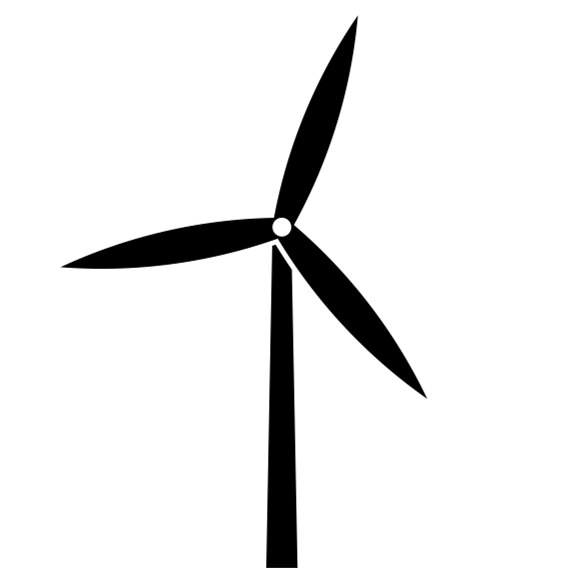
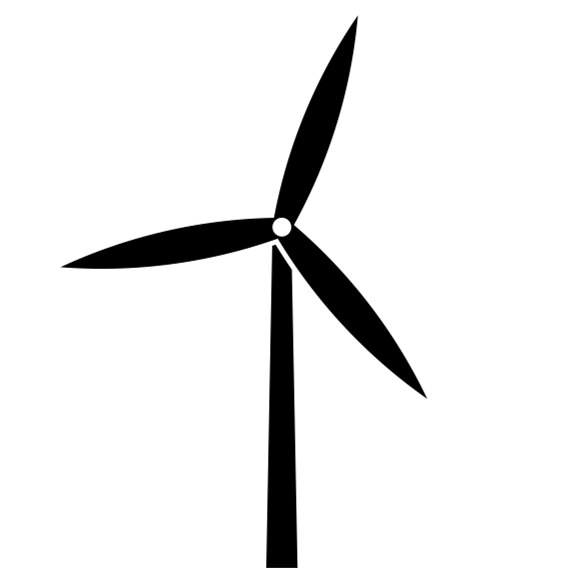
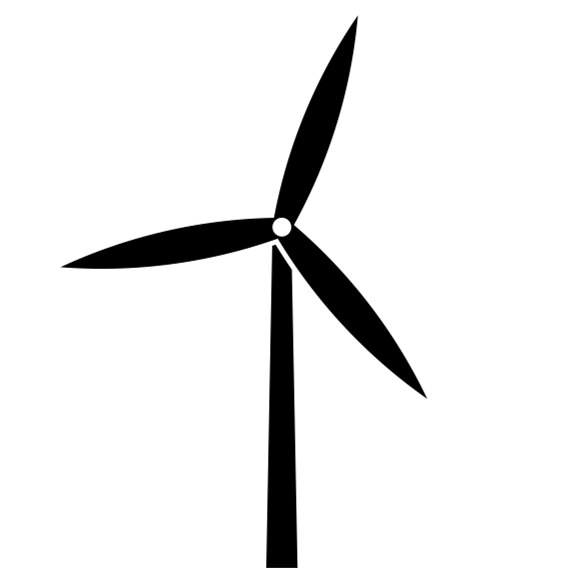
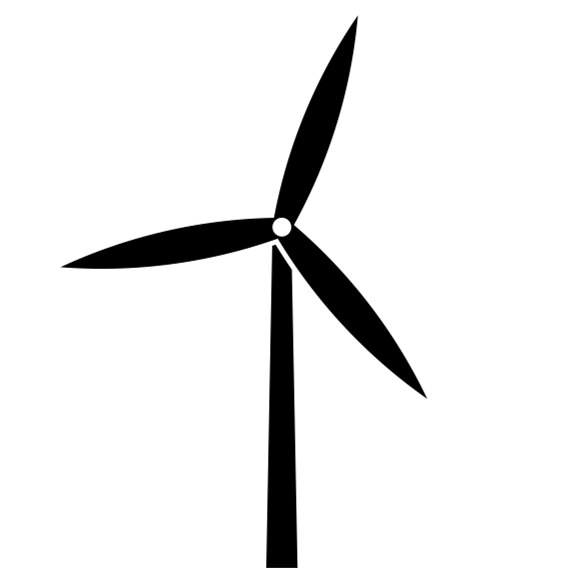
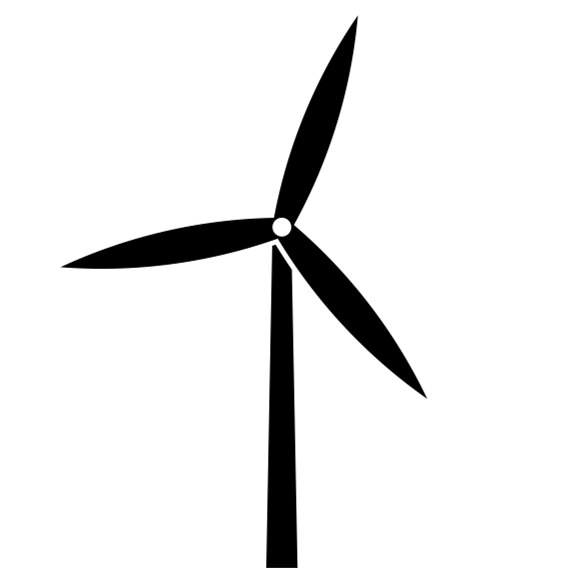
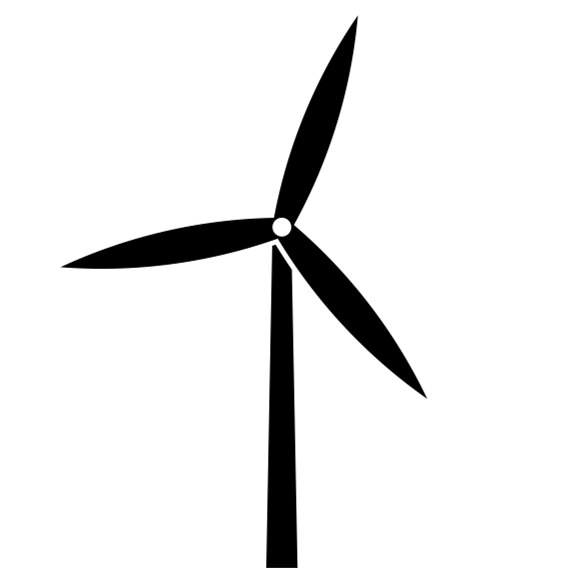
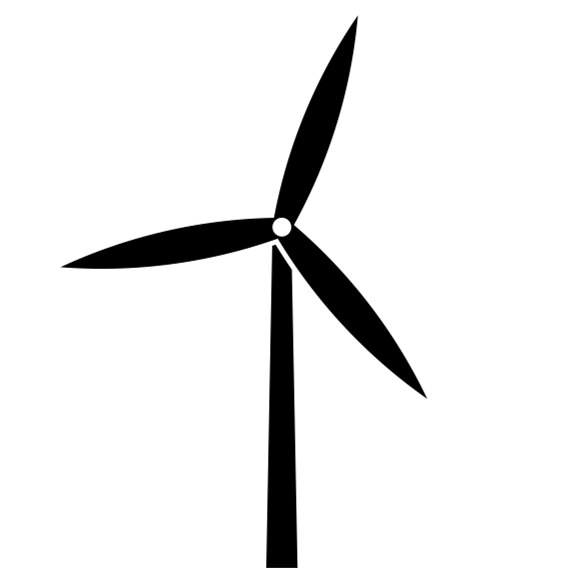
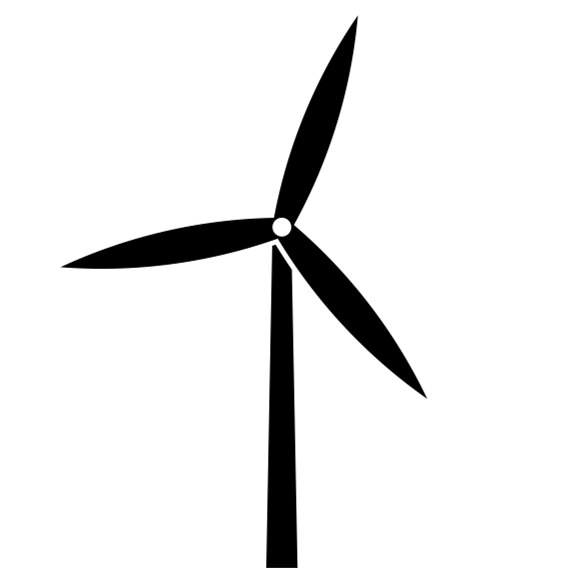
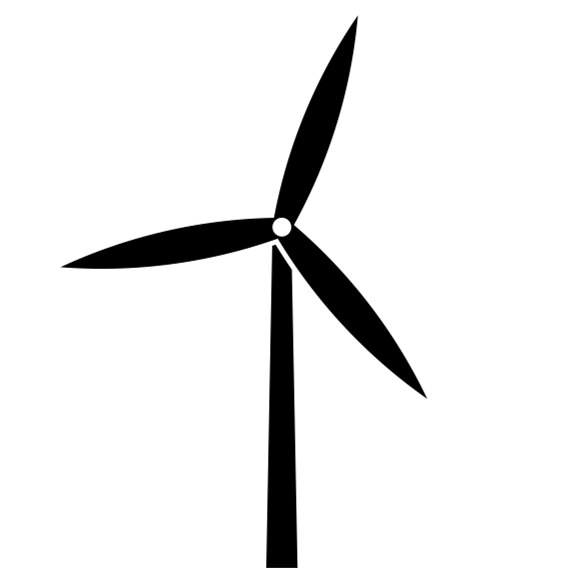
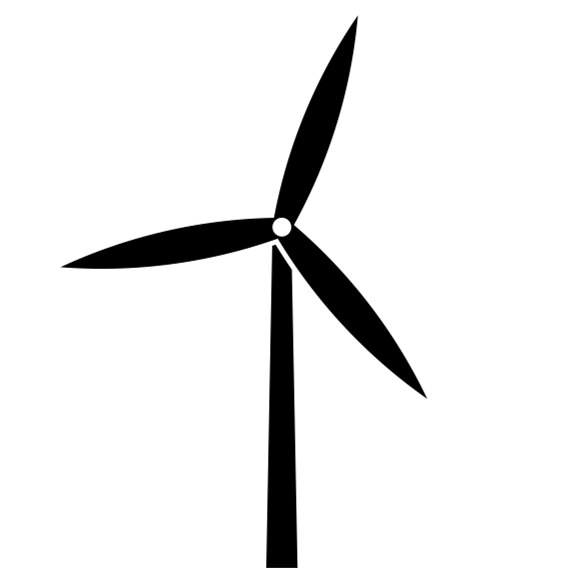
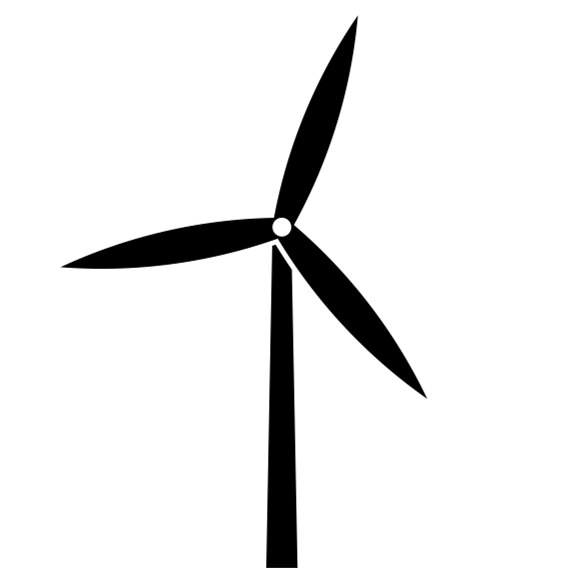
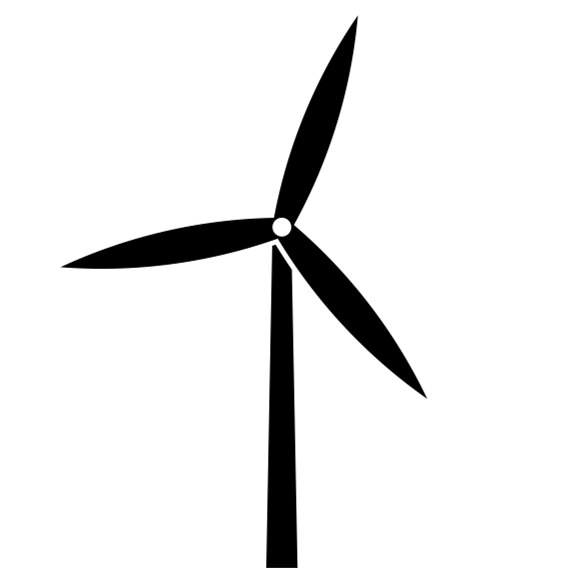
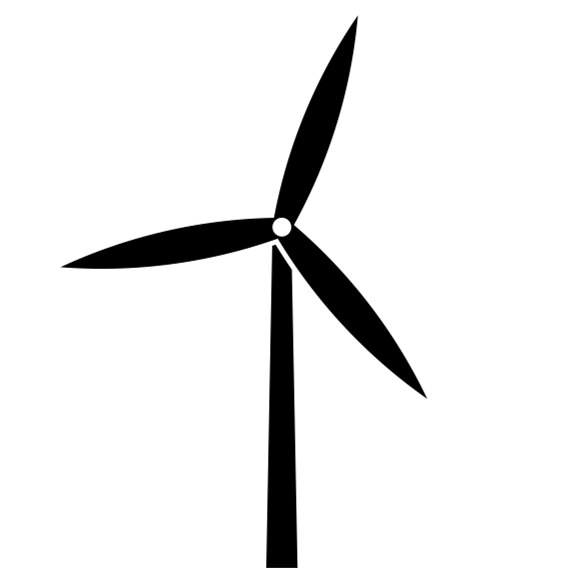
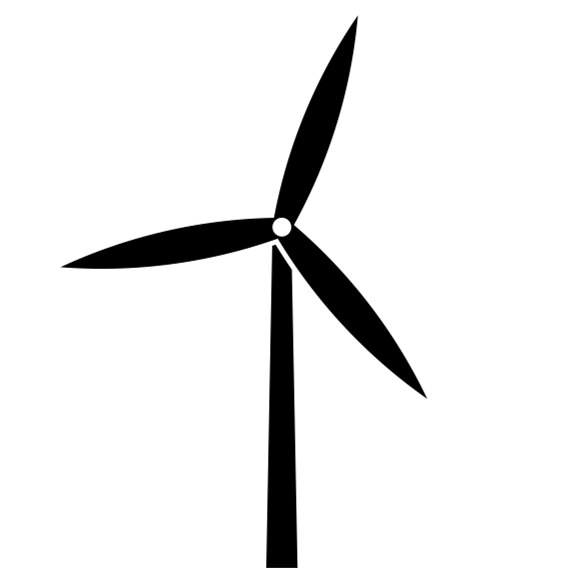
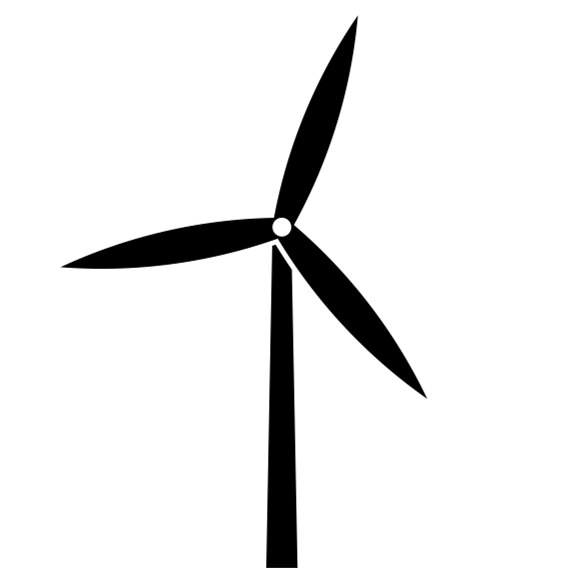
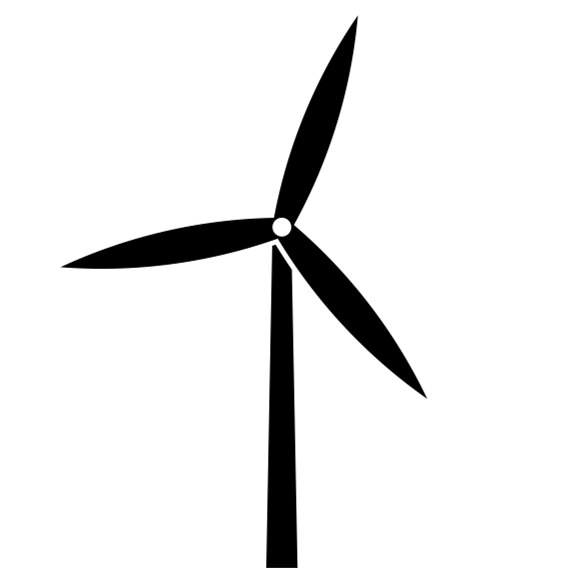
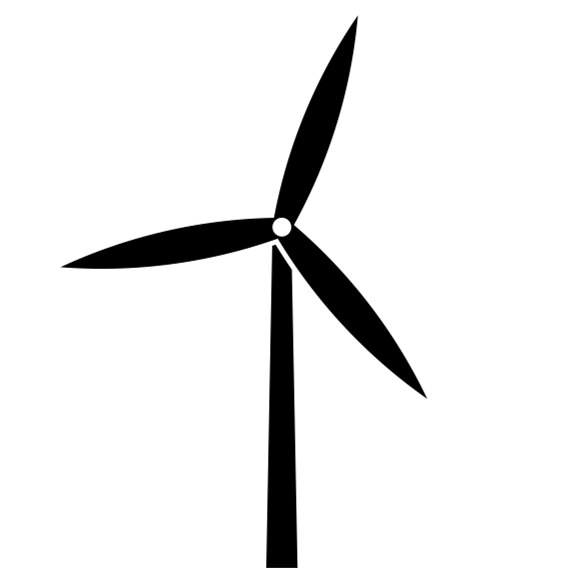
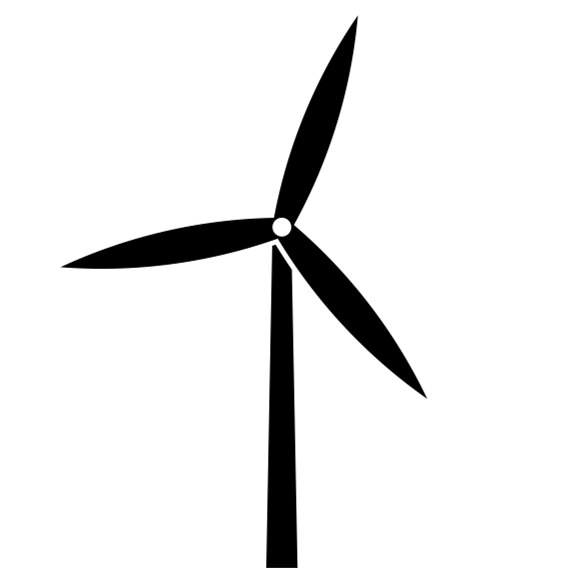
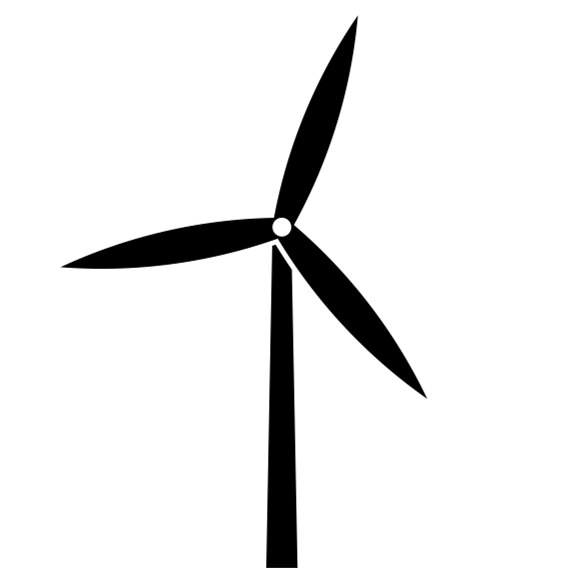

In [104]:
import folium
import pandas as pd

australia_map = folium.Map(location=[-30, 150], zoom_start=4, tiles='CartoDB positron')
icon_path = '../images/wind_turbine.png'

for file_name, df in wind_farm_data.items():
    farm_name = file_name.split('.')[0]
    
    
    
    icon_image = folium.CustomIcon(icon_path, icon_size=(40, 40))

    folium.Marker(
        location=[df.iloc[0]['Original Latitude'], df.iloc[0]['Original Longitude']],
        popup=f'{farm_name} Original',
        icon=icon_image
    ).add_to(australia_map)

    # Dot for the meteorological response location with a red color
    folium.CircleMarker(
        location=[df.iloc[0]['Response Latitude'], df.iloc[0]['Response Longitude']],
        radius=5,
        color='#5E94D4',
        fill=True,
        fill_color='#5E94D4',
        fill_opacity=1.0, 
        popup=f'{farm_name} Meteo Response'
    ).add_to(australia_map)
    
    
    line_points = [
        (df.iloc[0]['Original Latitude'], df.iloc[0]['Original Longitude']),
        (df.iloc[0]['Response Latitude'], df.iloc[0]['Response Longitude'])
    ]
    folium.PolyLine(
        line_points,
        color='#F7811E',
        weight=2,
        dash_array='5, 5'
    ).add_to(australia_map)
    

css_filter = """
<style>
    .leaflet-tile {
        filter: brightness(80%) saturate(70%);
    }
</style>
"""
australia_map.get_root().html.add_child(folium.Element(css_filter))

australia_map

In [118]:
import math 

yend_coordinates = wind_farm_data['YENDWF1.xlsx'].iloc[0]
yend_coordinates

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return distance

yend_distance = haversine(yend_coordinates['Original Latitude'], yend_coordinates['Original Longitude'], 
                          yend_coordinates['Response Latitude'], yend_coordinates['Response Longitude'])

print("Distance for YENDWF1.xlsx:", yend_distance, "km")


Distance for YENDWF1.xlsx: 4.72111285182045 km
